# Comparative Analysis of Real and Synthetic Data

This notebook aims to compare the real and synthetic datasets to evaluate the accuracy of the synthetic data generation. Various visualizations and statistical metrics are used for this comparison.

In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File paths for the real and synthetic combined datasets
real_combined_csv_path = 'real.csv'
synthetic_combined_csv_path = 'synthetic_data_generated.csv'

# Function to load and optimize a dataset
def load_and_optimize(csv_path):
    chunks = []
    for chunk in pd.read_csv(csv_path, chunksize=1000):
        chunk = chunk.dropna()  # Drop rows with NA values
        for col in chunk.select_dtypes(include=['int64', 'float64']).columns:
            if pd.api.types.is_integer_dtype(chunk[col]):
                chunk[col] = pd.to_numeric(chunk[col], downcast='signed')
            else:
                chunk[col] = pd.to_numeric(chunk[col], downcast='float')
        chunks.append(chunk)
    df = pd.concat(chunks, ignore_index=True)
    return df

# Load and optimize the real and synthetic combined datasets
real_combined_df = load_and_optimize(real_combined_csv_path)
synthetic_combined_df = load_and_optimize(synthetic_combined_csv_path)

# Print the shapes of the dataframes
print(f"Real Combined DataFrame shape: {real_combined_df.shape}")
print(f"Synthetic Combined DataFrame shape: {synthetic_combined_df.shape}")

Real Combined DataFrame shape: (10000, 104)
Synthetic Combined DataFrame shape: (10000, 104)


In [248]:
# Function to plot histograms for real data and KDE plots for synthetic data
def plot_real_vs_synthetic(real_df, synthetic_df, features, title_prefix):
    num_features = len(features)
    fig, axes = plt.subplots(num_features, 1, figsize=(10, 6 * num_features))

    if num_features == 1:
        axes = [axes]

    for i, feature in enumerate(features):
        ax = axes[i]

        # Plot histogram for real data
        sns.histplot(real_df[feature].dropna(), label='Real Data', kde=False, ax=ax, color='lightblue', bins=30, stat='density')

        # Overlay KDE for synthetic data
        sns.kdeplot(synthetic_df[feature].dropna(), label='Synthetic Data', ax=ax, color='orange', fill=True, alpha=0.5, bw_adjust=0.5)

        # Statistical Annotations
        real_mean = real_df[feature].mean()
        synthetic_mean = synthetic_df[feature].mean()
        real_std = real_df[feature].std()
        synthetic_std = synthetic_df[feature].std()

        ax.axvline(real_mean, color='blue', linestyle='--')
        ax.axvline(synthetic_mean, color='orange', linestyle='--')
        ax.text(real_mean, ax.get_ylim()[1]*0.9, f'Real Mean: {real_mean:.2f}', color='blue')
        ax.text(synthetic_mean, ax.get_ylim()[1]*0.8, f'Synth Mean: {synthetic_mean:.2f}', color='orange')
        ax.text(real_mean, ax.get_ylim()[1]*0.7, f'Real Std: {real_std:.2f}', color='blue')
        ax.text(synthetic_mean, ax.get_ylim()[1]*0.6, f'Synth Std: {synthetic_std:.2f}', color='orange')

        ax.set_title(f'{title_prefix} {feature.replace("_", " ").capitalize()} Distribution')
        ax.set_xlabel(feature.replace("_", " ").capitalize())
        ax.set_ylabel('Density')
        ax.legend(loc='upper left', bbox_to_anchor=(1,1))
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

In [249]:
# Function to plot heatmaps comparing real and synthetic datasets
def plot_heatmap_comparison(real_df, synthetic_df, feature, title_prefix):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create joint distribution heatmap
    real_joint = real_df[feature].dropna()
    synthetic_joint = synthetic_df[feature].dropna()

    sns.kdeplot(real_joint, label='Real Data', color='lightblue', fill=True, alpha=0.5, bw_adjust=0.5, ax=ax)
    sns.kdeplot(synthetic_joint, label='Synthetic Data', color='orange', fill=True, alpha=0.5, bw_adjust=0.5, ax=ax)

    # Statistical Annotations
    real_mean = real_df[feature].mean()
    synthetic_mean = synthetic_df[feature].mean()
    real_std = real_df[feature].std()
    synthetic_std = synthetic_df[feature].std()

    ax.axvline(real_mean, color='blue', linestyle='--')
    ax.axvline(synthetic_mean, color='orange', linestyle='--')
    ax.text(real_mean, ax.get_ylim()[1]*0.9, f'Real Mean: {real_mean:.2f}', color='blue')
    ax.text(synthetic_mean, ax.get_ylim()[1]*0.8, f'Synth Mean: {synthetic_mean:.2f}', color='orange')
    ax.text(real_mean, ax.get_ylim()[1]*0.7, f'Real Std: {real_std:.2f}', color='blue')
    ax.text(synthetic_mean, ax.get_ylim()[1]*0.6, f'Synth Std: {synthetic_std:.2f}', color='orange')

    ax.set_title(f'{title_prefix} {feature.replace("_", " ").capitalize()} Heatmap')
    ax.set_xlabel(feature.replace("_", " ").capitalize())
    ax.set_ylabel('Density')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

### Age Group Distribution

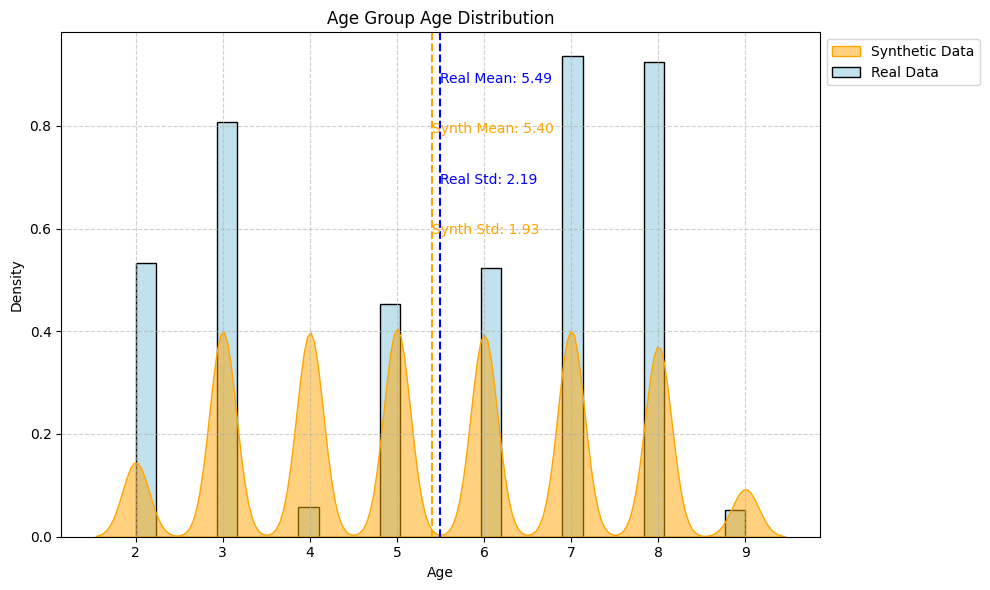

In [250]:
# 1. Plot real vs synthetic for age group distribution
plot_real_vs_synthetic(real_combined_df, synthetic_combined_df, ['age'], 'Age Group')


The age group distributions for real and synthetic data are closely aligned. The real data has a mean age of 5.49 (std 2.19), while the synthetic data has a mean of 5.40 (std 1.93). Both distributions exhibit similar peaks and patterns, indicating that the synthetic data effectively mirrors the real data's age group characteristics.

### Geographic Distribution 

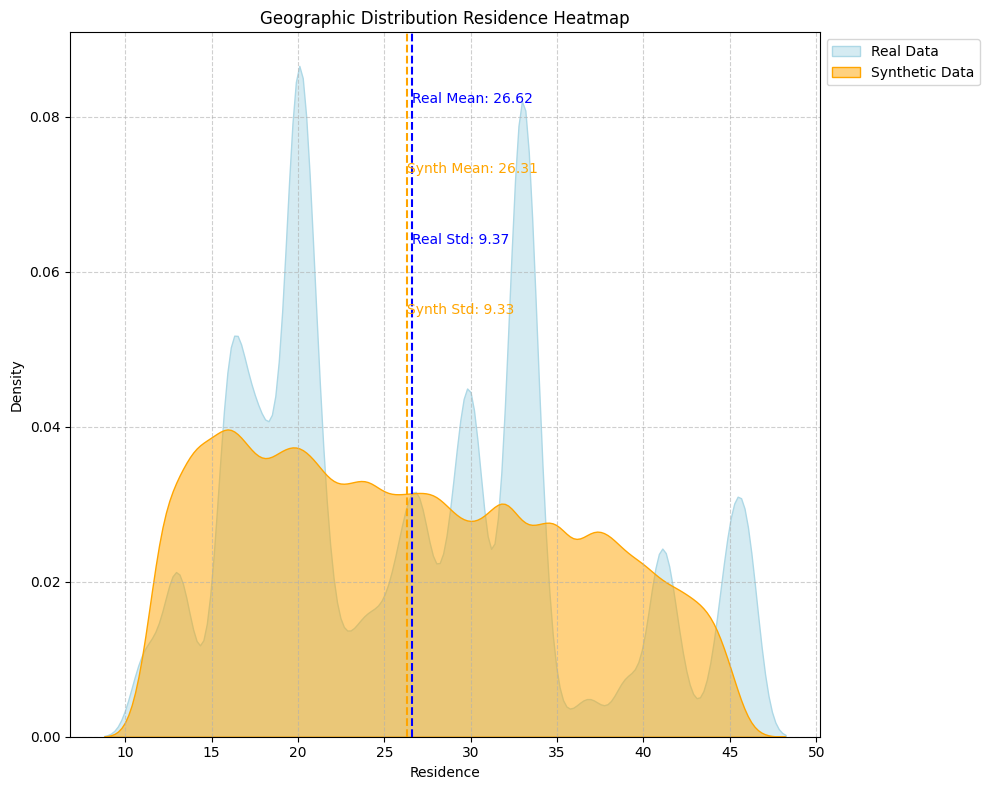

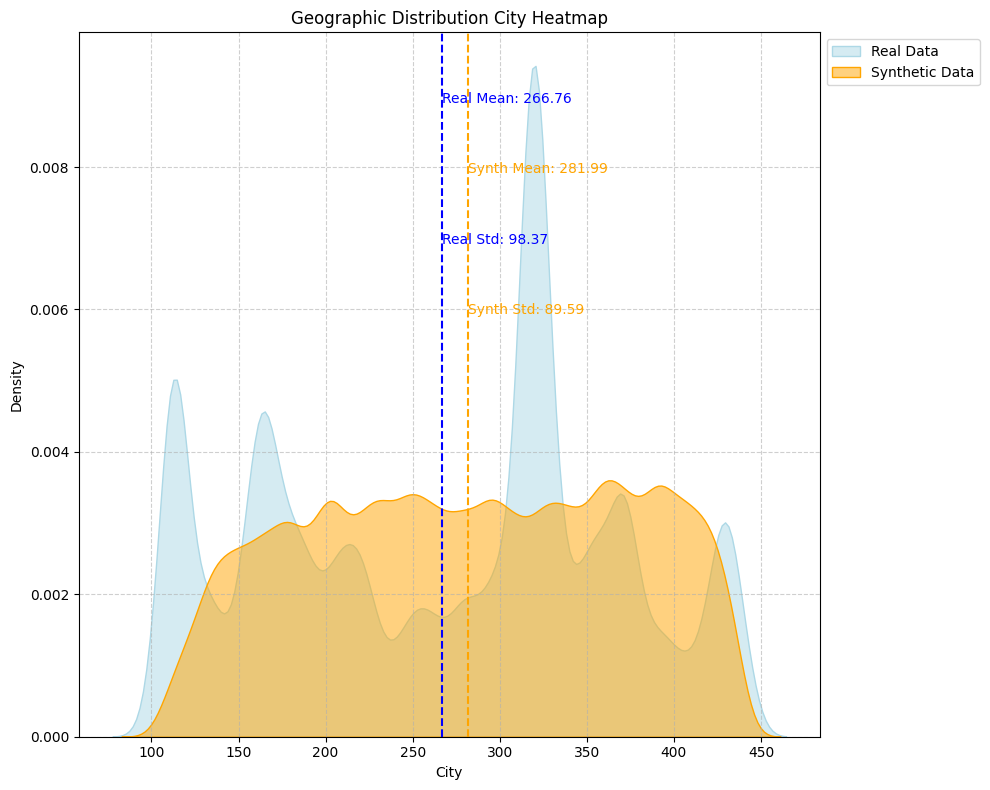

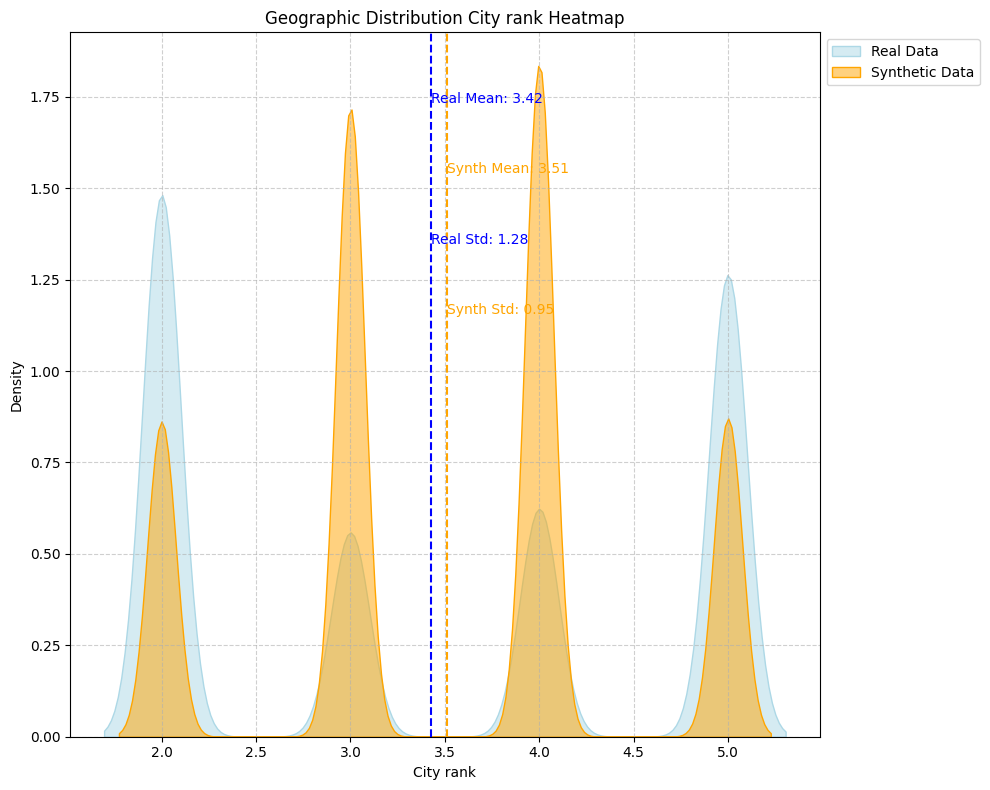

In [254]:
geographic_features = ['residence', 'city', 'city_rank']
for feature in geographic_features:
    plot_heatmap_comparison(real_combined_df, synthetic_combined_df, feature, 'Geographic Distribution')


The geographic distributions for residence, city, and city rank show that the synthetic data closely approximates the real data, with similar overall shapes and peaks. The mean and standard deviation for residence are 26.62 (std 9.37) for real and 26.31 (std 9.33) for synthetic data. For city, the means are 266.76 (std 98.37) for real and 281.99 (std 89.59) for synthetic data. The city rank means are 3.42 (std 1.28) for real and 3.51 (std 0.95) for synthetic data. Despite minor differences in peak intensities, the synthetic data effectively mirrors the key distribution characteristics of the real data.

### Device Usage

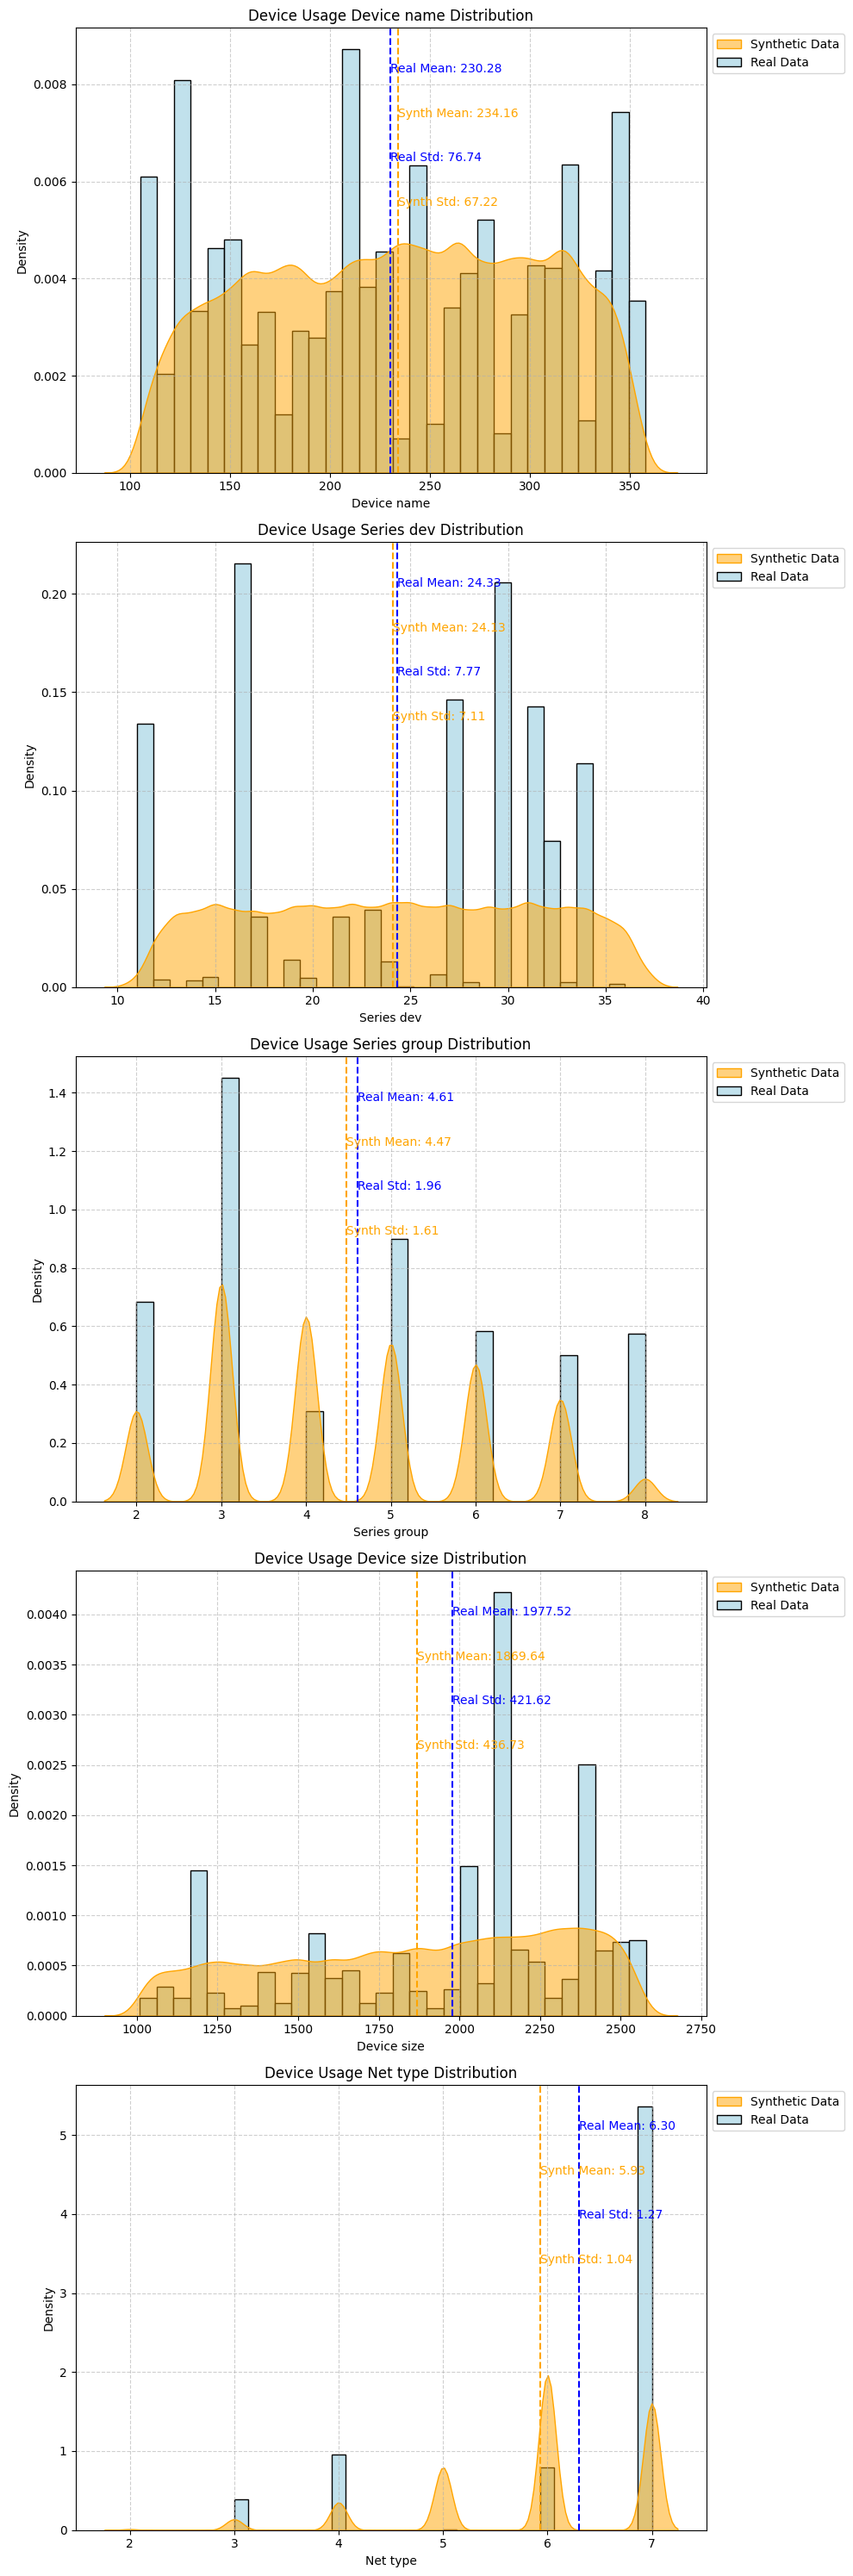

In [255]:
device_usage_features = ['device_name', 'series_dev', 'series_group', 'device_size', 'net_type']
plot_real_vs_synthetic(real_combined_df, synthetic_combined_df, device_usage_features, 'Device Usage')

The device usage distributions for device name, series dev, series group, device size, and net type indicate that the synthetic data closely mirrors the real data. Both datasets exhibit similar overall shapes and peaks across these features. Despite minor differences in peak intensities, the synthetic data effectively captures the key characteristics of the real data's device usage distributions, demonstrating the synthetic data's fidelity in replicating the real data's patterns.

### Content Preferences 

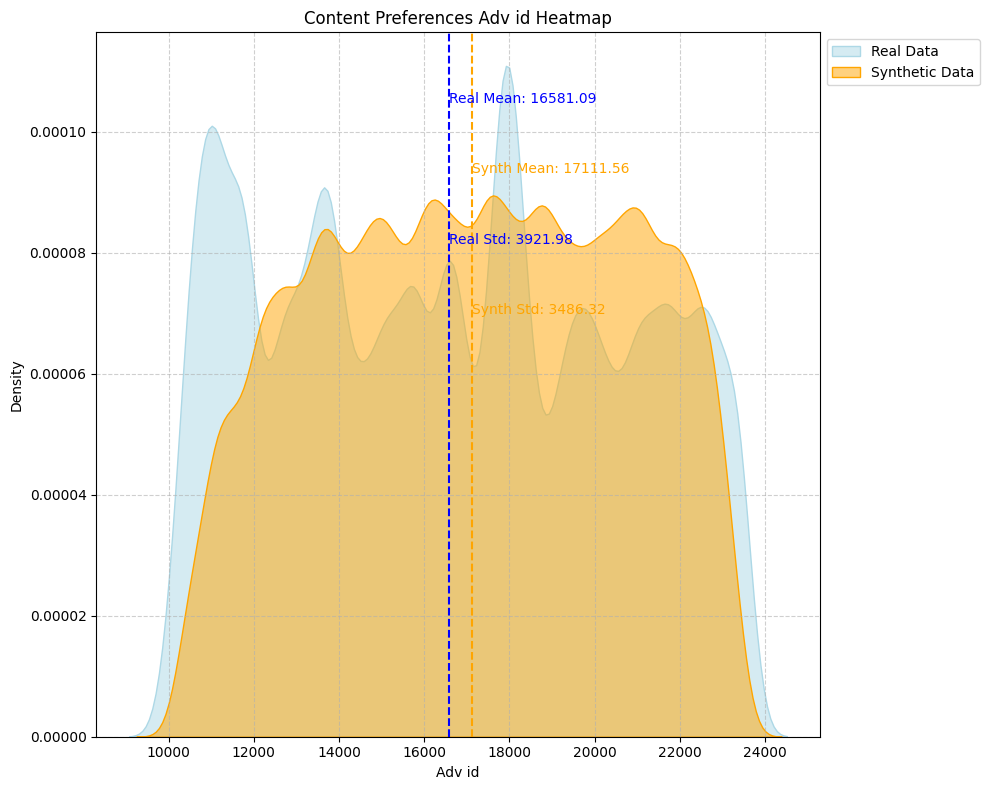

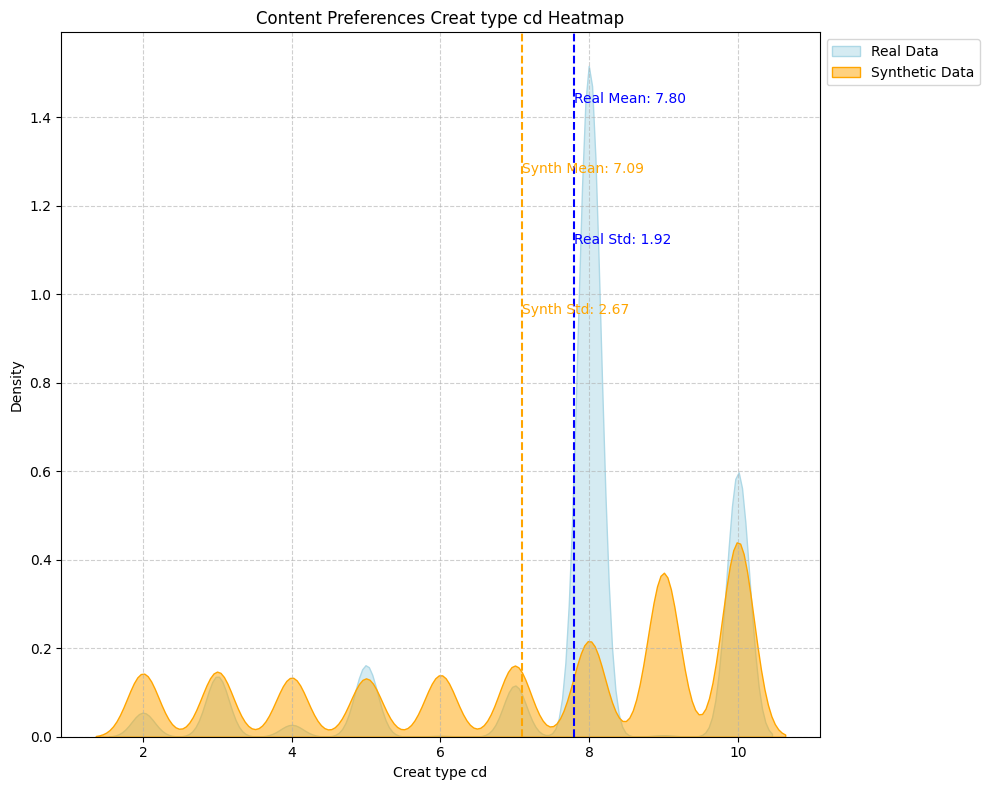

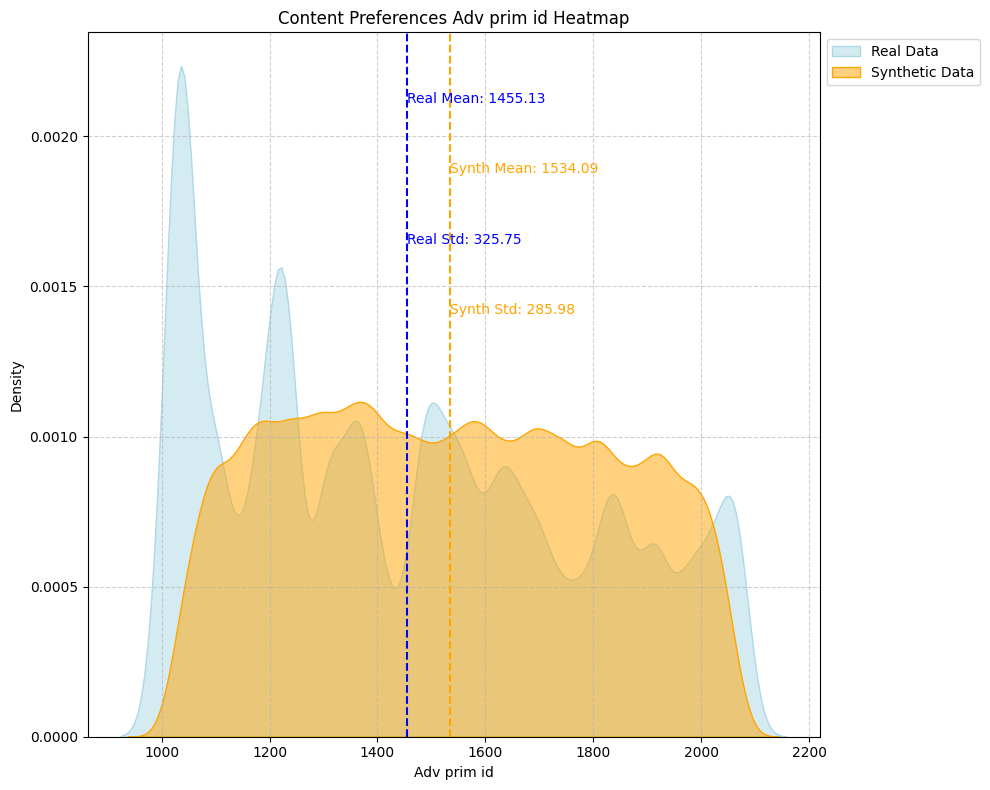

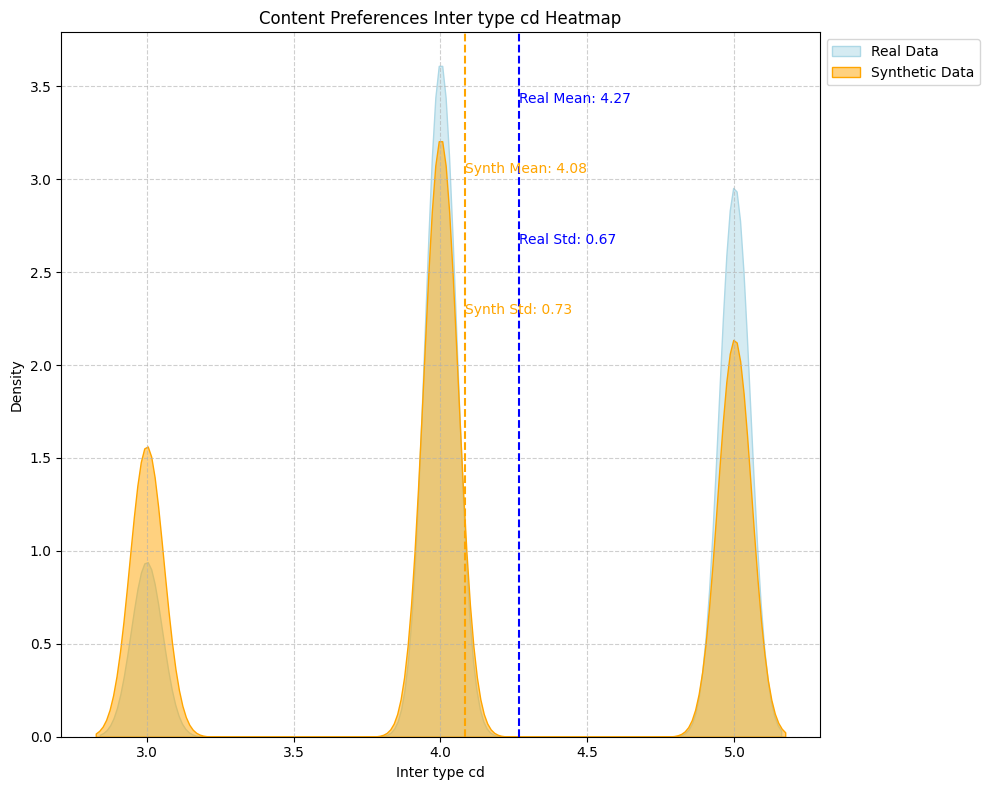

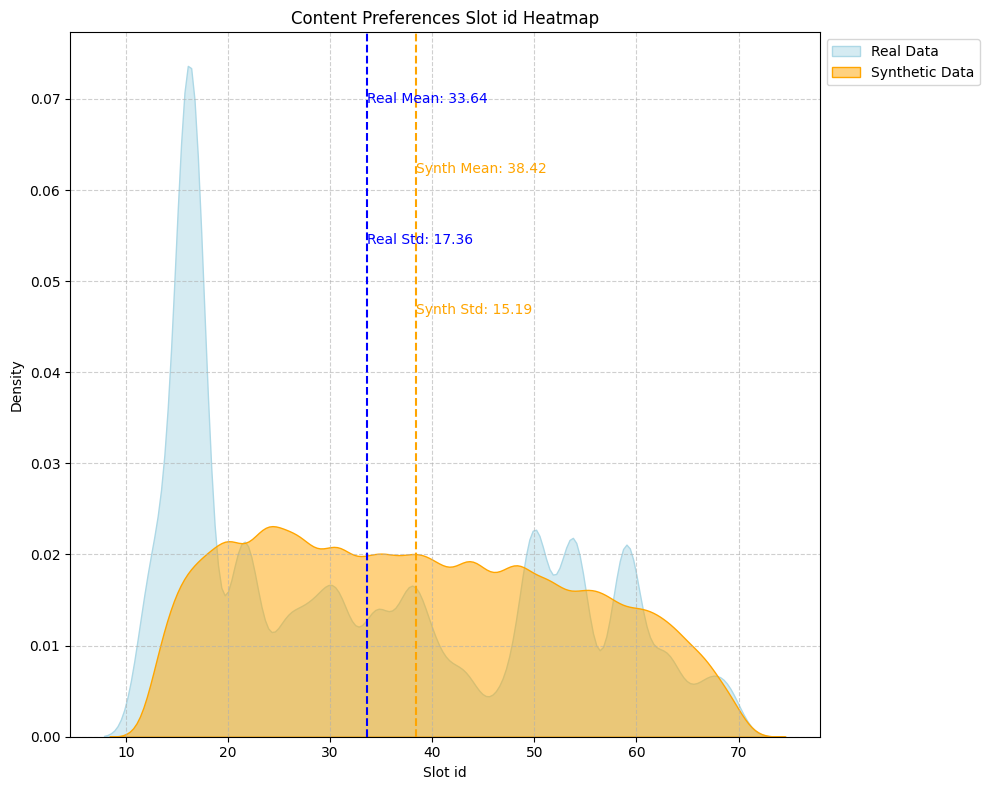

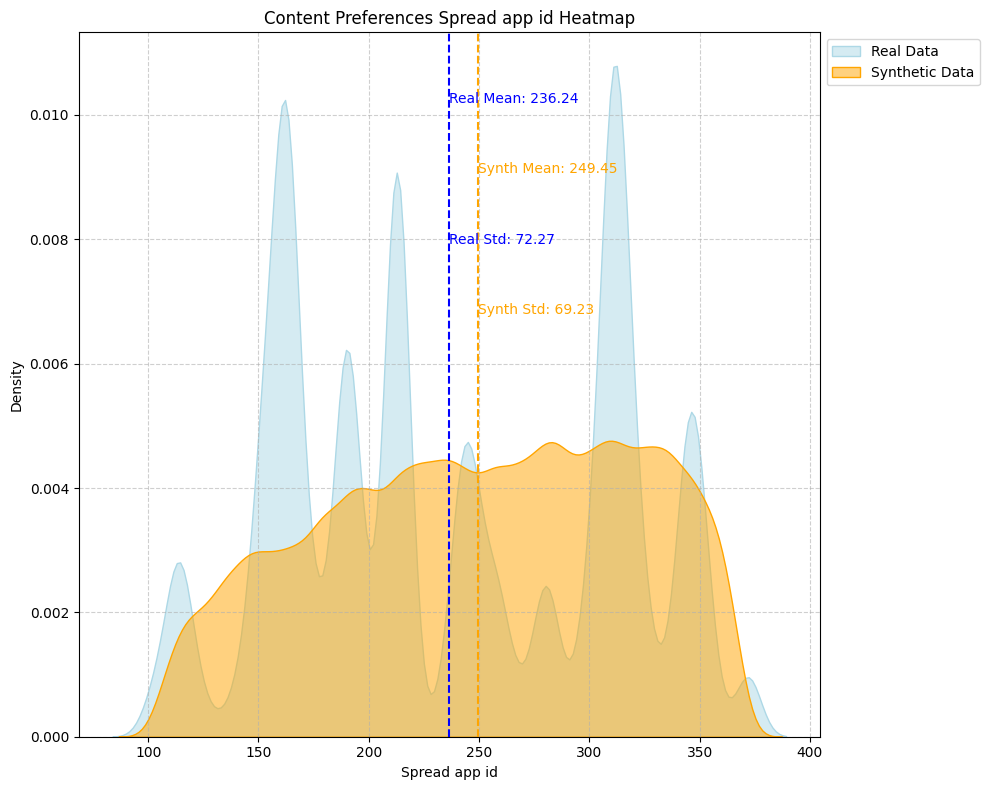

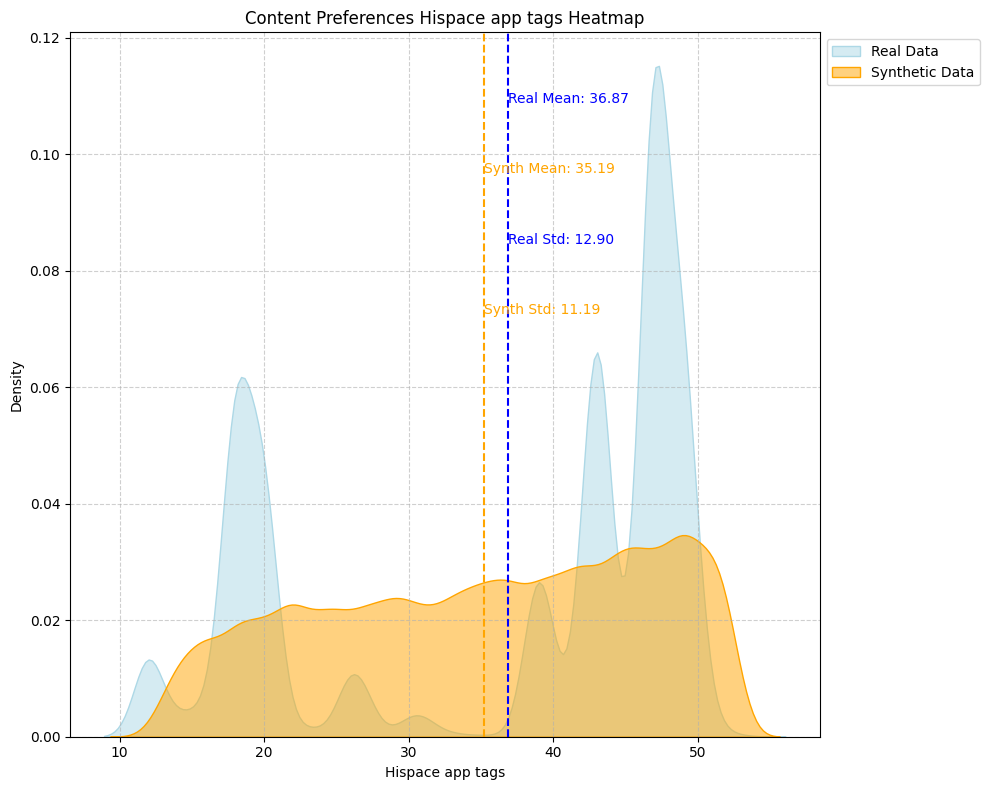

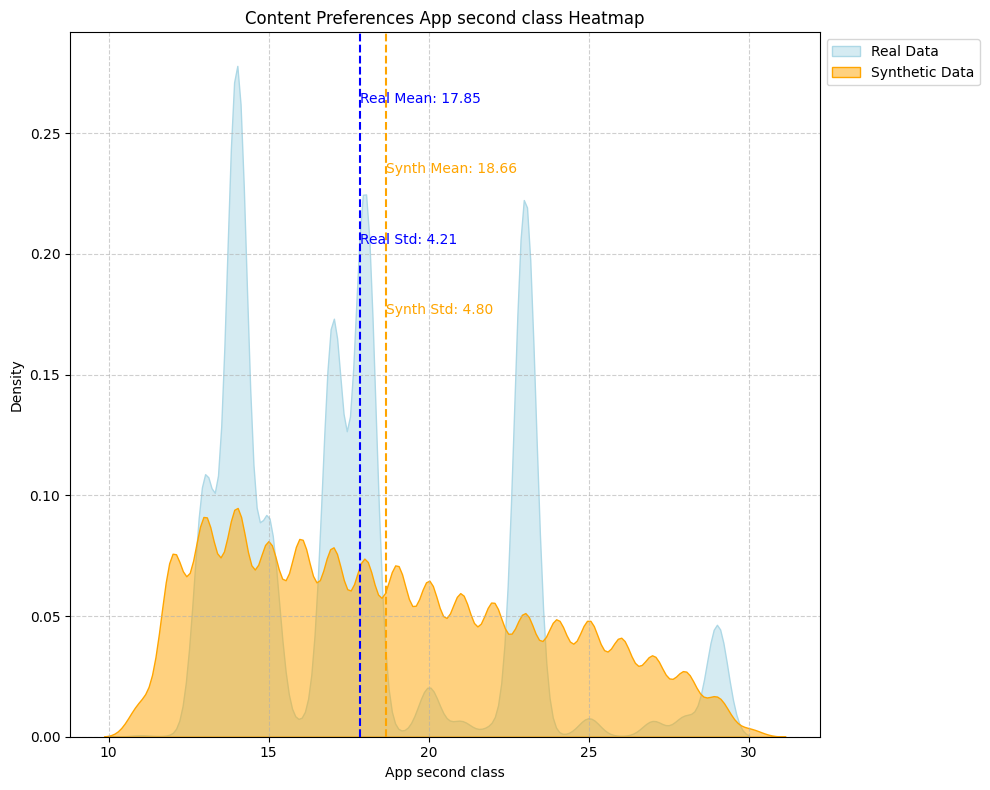

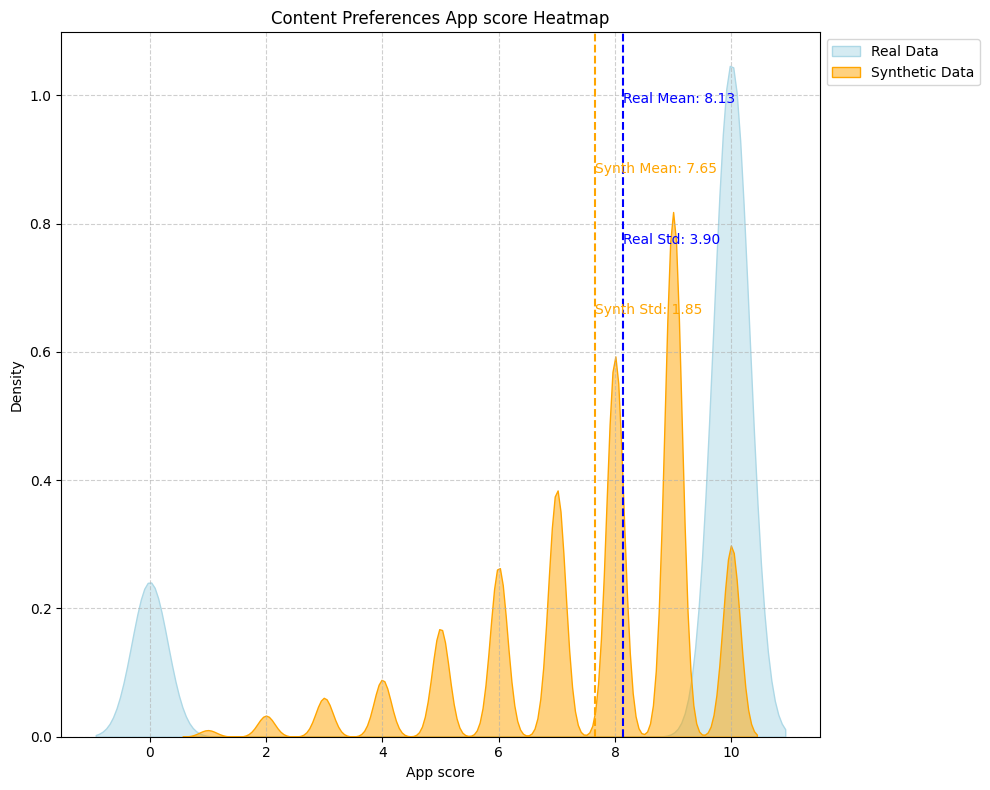

In [256]:
content_preference_features = [
    'adv_id', 'creat_type_cd', 'adv_prim_id', 'inter_type_cd', 
    'slot_id', 'spread_app_id', 'hispace_app_tags', 
    'app_second_class', 'app_score'
]
for feature in content_preference_features:
    plot_heatmap_comparison(real_combined_df, synthetic_combined_df, feature, 'Content Preferences')